1. 로켓의 속도를 알기위해서는 실시간으로 변하는 가속도를 계산해야하는게 정석이지만, 주어진 스펙으로 최종속도만 계산해서 목표시간이 지났을 때 최종속도에 도달한다고 단순적분시켜버리기.
2. PID로 궤적을 따라가기 위해서는

In [ ]:
import time
import math
gravity = 9.80665

# 비추력
specific_impulse_1 = 263
specific_impulse_2 = 421
specific_impulse_3 = 421

propellent_mass_1 = 2077000
propellent_mass_2 = 456100
propellent_mass_3 = 39136 # 3단은 두번에 나눠 점화한다 => state 3, 4로 나눔.
propellent_mass_4 = 83864

burntime_1 = 168
burntime_2 = 360
burntime_3 = 165
burntime_4 = 335

stage_mass_1 = 137000
stage_mass_2 = 40100
stage_mass_3 = 15200
lm = 15103
cmsm = 11900 # command module and service module

total_mass_1 = propellent_mass_1 + stage_mass_1 + propellent_mass_2 + stage_mass_2 + propellent_mass_3 + stage_mass_3 + propellent_mass_4 + lm + cmsm
total_mass_2 = propellent_mass_2 + stage_mass_2 + propellent_mass_3 + stage_mass_3 + propellent_mass_4 + lm + cmsm
total_mass_3 = propellent_mass_3 + stage_mass_3 + propellent_mass_4 + lm + cmsm
total_mass_4 = stage_mass_3 + propellent_mass_4 + lm + cmsm

clock_period = 1

print("total_mass_1: ", total_mass_1)
print("total_mass_2: ", total_mass_2)
print("total_mass_3: ", total_mass_3)


In [ ]:

## initial state
initial_velocity = 0
used_propellent_mass = 0
specific_impulse = specific_impulse_1
propellent_mass = propellent_mass_1
burntime = burntime_1
initial_mass = total_mass_1
consume_ratio = propellent_mass / burntime

## final state
final_mass = total_mass_2
# 상대속도 u'
relative_velocity = specific_impulse * gravity
# mu = 질량비
final_mass_ratio = (initial_mass - propellent_mass)/initial_mass
final_speed = initial_velocity + (-1) * relative_velocity * math.log(final_mass_ratio)

initial_distance = 0
distance = 0
velocity_buffer = 0

while(True):
    # time.sleep(clock_period)   # consider as clock period
    if (propellent_mass - used_propellent_mass) < clock_period * consume_ratio: break

    used_propellent_mass = used_propellent_mass + clock_period * consume_ratio
    
    # 질량비, mu
    mass_ratio = (initial_mass - used_propellent_mass)/initial_mass
    ln_mass_ratio = math.log(mass_ratio)

    currnet_velocity = initial_velocity - relative_velocity * ln_mass_ratio
    distance = distance + (currnet_velocity + velocity_buffer) * clock_period / 2
    velocity_buffer = currnet_velocity

total_impulse = specific_impulse * gravity * consume_ratio
alpha = total_impulse / (initial_mass * relative_velocity)
l = initial_distance + 1/alpha *(relative_velocity*(mass_ratio*ln_mass_ratio - mass_ratio + 1))

print("initial propellent mass: ", propellent_mass, "kg")
print("used propellent mass: ", used_propellent_mass, "kg")
print("current velocity: ", currnet_velocity, "m/s")
print("final speed: ", final_speed, "m/s")
print(final_speed - currnet_velocity, "m/s left")
print(propellent_mass - used_propellent_mass, "kg left")
print("distance: ", distance/1000, "km")
print("l: ", l/1000, "km")

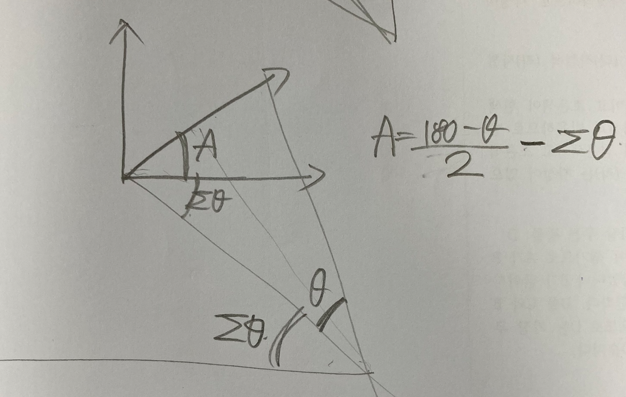

In [ ]:

## initial state
initial_velocity = 0
used_propellent_mass = 0
specific_impulse = specific_impulse_1
propellent_mass = propellent_mass_1
burntime = burntime_1
initial_mass = total_mass_1
consume_ratio = propellent_mass / burntime

## final state
final_mass = total_mass_2
# 상대속도 u'
relative_velocity = specific_impulse * gravity
# mu = 질량비
final_mass_ratio = (initial_mass - propellent_mass)/initial_mass
final_speed = initial_velocity + (-1) * relative_velocity * math.log(final_mass_ratio)

initial_distance = 0
distance = 0
velocity_buffer = 0

target_altitude = 188000
angle_at_30km = 37.229
accumulated_angle = 0
radius = 400000
rad_to_deg = 180/math.pi

while(True):
    # time.sleep(clock_period)   # consider as clock period
    if (propellent_mass - used_propellent_mass) < clock_period * consume_ratio: break

    used_propellent_mass = used_propellent_mass + clock_period * consume_ratio
    
    # 질량비, mu
    mass_ratio = (initial_mass - used_propellent_mass)/initial_mass
    ln_mass_ratio = math.log(mass_ratio)

    currnet_velocity = initial_velocity - relative_velocity * ln_mass_ratio
    distance = distance + (currnet_velocity + velocity_buffer) * clock_period / 2
    velocity_buffer = currnet_velocity

    if distance >= 30000:
        angular_velocity = currnet_velocity/radius * rad_to_deg
        goal_angle = (180-angular_velocity)/2 - accumulated_angle
        accumulated_angle = accumulated_angle + angular_velocity
        # print(angular_velocity, "degree/s")
        print(goal_angle, "degree")


## final travel length calculator using total impulse
total_impulse = specific_impulse * gravity * consume_ratio
alpha = total_impulse / (initial_mass * relative_velocity)
l = initial_distance + 1/alpha *(relative_velocity*(mass_ratio*ln_mass_ratio - mass_ratio + 1))

print("initial propellent mass: ", propellent_mass, "kg")
print("current velocity: ", currnet_velocity, "m/s")
print("distance: ", distance/1000, "km")
print("l: ", l/1000, "km")
print(goal_angle, "degree")

In [ ]:

## initial state
initial_velocity = 0
used_propellent_mass = 0
specific_impulse = specific_impulse_1
propellent_mass = propellent_mass_1
burntime = burntime_1
initial_mass = total_mass_1
consume_ratio = propellent_mass / burntime

## final state
final_mass = total_mass_2
# 상대속도 u'
relative_velocity = specific_impulse * gravity
# mu = 질량비
final_mass_ratio = (initial_mass - propellent_mass)/initial_mass
final_speed = initial_velocity + (-1) * relative_velocity * math.log(final_mass_ratio)

initial_distance = 0
distance = 0
velocity_buffer = 0

target_altitude = 188000
angle_at_30km = 37.229
accumulated_angle = 0
radius = 400000
rad_to_deg = 180/math.pi

while(True):
    # time.sleep(clock_period)   # consider as clock period
    if (propellent_mass - used_propellent_mass) < clock_period * consume_ratio: break

    used_propellent_mass = used_propellent_mass + clock_period * consume_ratio
    
    # 질량비, mu
    mass_ratio = (initial_mass - used_propellent_mass)/initial_mass
    ln_mass_ratio = math.log(mass_ratio)

    currnet_velocity = initial_velocity - relative_velocity * ln_mass_ratio
    distance = distance + (currnet_velocity + velocity_buffer) * clock_period / 2
    velocity_buffer = currnet_velocity

    if distance >= 30000:
        angular_velocity = currnet_velocity/radius * rad_to_deg
        goal_angle = (180-angular_velocity)/2 - accumulated_angle
        accumulated_angle = accumulated_angle + angular_velocity
        # print(angular_velocity, "degree/s")
        print(goal_angle, "degree")


## final travel length calculator using total impulse
total_impulse = specific_impulse * gravity * consume_ratio
alpha = total_impulse / (initial_mass * relative_velocity)
l = initial_distance + 1/alpha *(relative_velocity*(mass_ratio*ln_mass_ratio - mass_ratio + 1))

print("initial propellent mass: ", propellent_mass, "kg")
print("current velocity: ", currnet_velocity, "m/s")
print("distance: ", distance/1000, "km")
print("l: ", l/1000, "km")
print(goal_angle, "degree")

In [ ]:
import math


class RocketEngineSimulator:
    def __init__(self):
        self.gravity = 9.81  # assuming Earth's gravity

    def simulate_engine(
        self,
        clock_period,
        initial_velocity,
        specific_impulse,
        propellant_mass,
        burntime,
        total_mass,
    ):
        used_propellant_mass = 0
        consume_ratio = propellant_mass / burntime
        relative_velocity = specific_impulse * self.gravity  # self.gravity로 수정
        initial_mass = total_mass  # 초기 전체 질량

        final_mass_ratio = (initial_mass - propellant_mass) / initial_mass
        goal_speed = initial_velocity + (-1) * relative_velocity * math.log(
            final_mass_ratio
        )

        while True:
            if (propellant_mass - used_propellant_mass) < clock_period * consume_ratio:
                break

            used_propellant_mass += clock_period * consume_ratio
            mass_ratio = (initial_mass - used_propellant_mass) / initial_mass
            ln_mass_ratio = math.log(mass_ratio)
            current_velocity = initial_velocity - relative_velocity * ln_mass_ratio

        remaining_propellant_mass = propellant_mass - used_propellant_mass
        yield_speed = (
            (-1)
            * relative_velocity
            * math.log((initial_mass - used_propellant_mass) / initial_mass)
        )

        return {
            "initial_propellant_mass": propellant_mass,
            "used_propellant_mass": used_propellant_mass,
            "current_velocity": current_velocity,
            "goal_speed": goal_speed,
            "remaining_propellant": remaining_propellant_mass,
            "yield_speed": yield_speed,
        }

    def calculate_distance(current_velocity, time_interval):
        return current_velocity * time_interval
    
    def altitude_calculator(self, crt_alt):
        alt_threshold = 30*1000
        angle_accumulator = 0
        radius = 400*1000

        if crt_alt > alt_threshold:
            anglur_velocity = currnet_velocity/radius
            angle_accumulator = angle_accumulator + anglur_velocity * time_interval
            delta_alt = current_velocity * math.sin(anglur_accumulator) * time_interval
            delta_hor = current_velocity * math.cos(anglur_accumulator) * time_interval

    def cmd_ang(self):
        return angle_accumulator
        pass

    def gimbal(self, cmd_ang, crt_ang):
        #############################
        ####### PID control #########
        #############################
        error = cmd_ang - crt_ang

        kp = 0.1
        pi = 0.1
        kd = 0.1

        inertial_rocket_angle = 39

        


        pass


In [ ]:

initial_velocity = 0

simulator = RocketEngineSimulator()
result = simulator.simulate_engine(1, initial_velocity, specific_impulse_1, propellent_mass_1, burntime_1, total_mass_1)
after_stage_1 = result["current_velocity"]

for key, value in result.items():
    print(f"{key}: {value}")


In [ ]:
simulator = RocketEngineSimulator()
result = simulator.simulate_engine(1, after_stage_1, specific_impulse_2, propellent_mass_2, burntime_2, total_mass_2)
after_stage_2 = result["current_velocity"]

for key, value in result.items():
    print(f"{key}: {value}")

In [ ]:
simulator = RocketEngineSimulator()
result = simulator.simulate_engine(1, after_stage_2, specific_impulse_3, propellent_mass_3, burntime_3, total_mass_3)
after_stage3 = result["current_velocity"]

for key, value in result.items():
    print(f"{key}: {value}")